# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### СОДЕРЖАНИЕ

<li>
<a href='#section0'>1. Изучение информации</a>
    <ul>
        <a href='#section1'>     1. Импорт библиотек</a>
    </ul>
    <ul>
        <a href='#section2'>     1.2. Добавление табуляции</a>
    </ul>
     <ul>
        <a href='#section3'>     1.3. Уникальные наименования</a>
    </ul>
    <ul>
        <a href='#section4'>     1.4. Информация о датасете</a>
    </ul>
    <ul>
        <a href='#section5'>     1.5. Поиск дубликатов</a>
    </ul>
    <ul>
        <a href='#section6'>     1.6. Поиск пропущенных значений</a>
    </ul>
</li>

<li>
<a href='#section7'>2. Предобработка данных</a>
    <ul>
        <a href='#section8'>     2.1. Заполнение пропусков количества этажей</a>
    </ul>
    <ul>
        <a href='#section9'>     2.2. Популярные этажи в Санкт-Петербурге</a>
    </ul>
    <ul>
        <a href='#section10'>    2.4. Удаление данных с пропущенными строками</a>
    </ul>
     <ul>
        <a href='#section11'>    2.5. Замена пропусков "балконы" </a>
    </ul>
    <ul>
        <a href='#section12'>    2.6. Изменение высоты потолков </a>
    </ul>
    <ul>
        <a href='#section13'>    2.7. Средний процент жилой и кухонной площади от общей</a>
    </ul>
     <ul>
        <a href='#section14'>    2.8. Замена пропусков жилой площади</a>
    </ul>
    <ul>
        <a href='#section15'>    2.9. Удаление пропущенных значений в "количестве дней размещения"</a>
    </ul>
    <ul>
        <a href='#section16'>    2.10. Приведение к формату %Y-%m-%d:'</a>
    </ul>
    <ul>
        <a href='#section17'>    2.11. Замена типов данных</a>
    </ul>
     <ul>
        <a href='#section18'>    2.12. Замены буквы Ё на Е</a>
    </ul>
    <ul>
        <a href='#section19'>    2.13.  Заполнение пропусков медианой по срезу данных</a>
    </ul>
</li> 

<li>
 <a href='#section20'>3. Добавление данных в таблицу</a>
     <ul>
        <a href='#section21'>    3.1.   Цена квадратного метра</a>
    </ul>
    <ul>
        <a href='#section22'>    3.2.    День недели, месяц и год публикации объявления</a>
    </ul>
    <ul>
        <a href='#section23'>    3.3.    Этаж квартиры; варианты — первый, последний, другой</a>
    </ul>
    <ul>
        <a href='#section24'>    3.4.     Соотношение жилой и общей площади, а также отношение площади кухни к общей</a>
    </ul>
</li>

<li>
 <a href='#section25'>4. Исследовательский анализ данных</a>
    <ul>
        <a href='#section26'>    4.1.     Анализ площади</a>
    </ul>
    <ul>
        <a href='#section27'>    4.2.     Анализ цен</a>
    </ul>
    <ul>
        <a href='#section28'>    4.3.     Анализ числа комнат</a>
    </ul>
    <ul>
        <a href='#section29'>    4.4.     Анализ высоты потолков</a>
    </ul>
     <ul>
        <a href='#section30'>    4.5.     Время продажи</a>
    </ul>
    <ul>
        <a href='#section31'>    4.6.      Факторы, влияющие на стоимость недвижимости</a>
        <ul>
            <a href='#section32'>    4.6.1.  Зависимость стоимости недвижимости от цены квадратного метра</a>
        </ul>
         <ul>
            <a href='#section33'>    4.6.2.  Зависимость стоимости недвижимости от числа комнат</a>
        </ul>
         <ul>
            <a href='#section34'>    4.6.3.  Зависимость стоимости недвижимости от этажа</a>
        </ul>
         <ul>
            <a href='#section35'>    4.6.4.  Зависимость стоимости недвижимости от даты публикации объявления</a>
        </ul>
         <ul>
            <a href='#section36'>    4.6.5.  Зависимость стоимости недвижимости от расстояние до центра города (м)</a>
        </ul>
    </ul>
     <ul>
        <a href='#section37'>    4.7.       10 населённых пунктов с наибольшим числом объявлений</a>
    </ul>
     <ul>
        <a href='#section38'>    4.8.       Недвижимость в Санкт-Петербурге</a>
    </ul>
</li>

<li>
 <a href='#section39'>5. Общий вывод</a>
</li>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

##### Импортируем нужные нам библиотеки для работы.
<a id='section1'></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv')

Прочитаем описание и информацию о датасете. 

In [ ]:
df.info

In [ ]:
df.describe

##### Добавление табуляции
С этими данными нельзя работать. Приведем в порядок. Видим, что колонки разделены табуляцией -t. Можно прочитать файл указав этот разделитель
<a id='section2'></a>

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

Теперь датафрейм имеет приятный вид. Посмотрим названия населенных пунктов. А еще потом посмотрим информацию и описание таблицы.

In [ ]:
df['locality_name'].head(50)

##### Уникальные наименования 
Посмотрим уникальные наименования всех поселков и п.г.т
<a id='section3'></a>

In [ ]:
town = df['locality_name'].sort_values().unique()
town

На глаз видно, что есть разница в написание буквы Ё в слове "поселок". 

In [ ]:
df.describe()

Кхмм, максимально 19 комнат. Квартира богачей?  Минимально 0 комнат?
Высота потолков 100 метров??? 

##### Информация о датасете
<a id='section4'></a>

In [ ]:
df.info()

##### Поиск дубликатов
Видим множество пропусков. Посмотрим, есть ли дубликаты.
<a id='section5'></a>

In [ ]:
df.duplicated().sum()

##### Поиск пропусков 
Явных дубликатов не видно. Посчитаем  количество пропусков в столбцах. 
<a id='section6'></a>

In [ ]:
df.isna().sum()

Мда. Около 100 тысяч пропусков. Нужно поработать над этим. 

### Вывод

1. Дубликаты отстутсвуют.
2. Есть вопросы по количествам комнат и высотой потолков.
3. Нужно исправить разницу в написании буквые Е в слове "Поселок".
4. В информации о таблице видно, что у некоторых столбцов неправильный тип данных, мы их переведем в целочисленный тип данных.
    
    balcony
    
    floors_total
    
    
5. Обработаем пропуски.
6. Приведем даты в 'first_day_exposition' - в нормальный вид.

### Шаг 2. Предобработка данных
<a id='section7'></a>

# 1. Начнем заполнять пропуски.

Сначала начнем заполнять пропуски у тех значений, где их меньше всего.

##### Заполнение пропусков количества этажей
<a id='section8'></a>

1. "floors_total"

In [ ]:
print('Количество пропусков по floors_total =', df['floors_total'].isnull().sum())

Посмотрим количество этажей у домов. Проглядим первые 50 значений. Видим, что этажность абсолютно разная. Конечно, встречаются стандартные советские пятиэтажки. 

In [ ]:
df['floors_total'].head(50)

Построим гистограмму и посмотрим на самые популярные этажности в Санкт-Петербурге.

##### Популярные этажи в Санкт-Петербурге 
<a id='section9'></a>

In [ ]:
df['floors_total'].hist(bins=100, range=(0, 60))
plt.xlabel("этаж")
plt.ylabel("кол-во людей")
plt.title('Всего этажей в доме')

In [ ]:
df['floors_total'].unique()

##### Удаление данные с пропущенными строками 
<a id='section10'></a>
Видим, что самые популярные 5, 9, 12 и 16 этажные дома. Я думаю, что если удалить данные с пропущенным строками, то ничего не произойдет, так как из 23 тысяч строк, пропущенных значений всего 86. А на данные это никак не повлияет. 


In [ ]:
df.dropna(subset = ['floors_total'], inplace = True)

2. "locality_name"



Так как пропусков в locality_name мало, то эти строки тоже можно удалить. 

In [ ]:
df.dropna(subset=['locality_name'], inplace= True)

##### Заменя пропусков "балконы"
<a id='section11'></a>
Balcony - Балконы. Как мы знаем, в квартирах кроме балконов бывают и лоджии, но не всегда. Поэтому пропуски балконов просто заменить на 0. 

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

##### Изменение высоты потолков
<a id='section12'></a>
Ceiling_height - высота потолков 100 метров - абсолютный бред, поэтому это какая-то статистическая ошибка. Если брать стандартные значения с интернета: высота потолков 2.5 - 3 метра высоты. 

Для начала посмотрим насколько выбиваются значения у средней арифметической и медианы. Чтобы выбрать замену для 100-метровых потолков. 

In [ ]:
df['ceiling_height'].hist(bins=100, range=(1.5, 5))
plt.xlabel("размер потолков в метрах")
plt.ylabel("кол-во людей")
plt.title('Высота потолков')

In [ ]:
height_median = df['ceiling_height'].median()
print(height_median)

In [ ]:
height_mean = df['ceiling_height'].mean()
print(height_mean)

Существенной разницы между медианой и средней арифмитеческой нет, но возьмем все же за 100-метровые потолки медианное значение.

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(height_median)

##### Средний процент жилой и кухонной площади от общей
<a id='section13'></a>
Я думаю, что значения в столбце 'living_area' были пропущены потому что, не все люди могут знать размеры своих квартир.   Заполнить пропуски медианой или средней арифметической сейчас не получится, так как значения покажут недостоверные размеры квартиры, а точность кв.м в недвижимостях необычайно важны. Нужно проверить тщательно данные.

Вначале посчитаем средний процент жилой площади от общей, затем куханной от общей. 

In [ ]:
df['part_living_area'] = round(df['living_area'] / df['total_area'], 2)
df['part_kitchen_area'] = round(df['kitchen_area'] / df['total_area'], 2)

In [ ]:
df['part_living_area'].hist(bins=100, range=(0, 1))
df['part_kitchen_area'].hist(bins=100, range=(0, 1))

plt.title('Оранжевый средний процент жилой площади от общей, затем синий - куханной от общей.')

##### Заполнение пропусков жилой площади
<a id='section14'></a>
Средний процент жилой площади от общей 55%, кухонной 15%, по этому принципу заполним пропуски

In [ ]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.55)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.15)

Проверим есть ли где то площадь больше чем сумма площадей кухни и жилой и даже закроем глаза на то что есть еще площадь
санузлов, корридоров, нежилых помещений

In [ ]:
df_err = df.query('total_area < (living_area+kitchen_area)')

100 квартир аномальных, проще удалить эти данные чем искать причину кто и где обсчитался



Проверим есть ли где то площадь больше чем сумма площадей кухни и жилой 
и даже закроем глаза на то что есть еще площадь санузлов, 
корридоров, нежилых помещений


Данные данные нам в анализе не актуальны, поэтому заполним все пропущенные значения значением False, тк скорее всего
эти кваритиры не являются апартаментами
Аналогично поступим с прудами и парками в районе 3 км ведь информацию скорее всего не указывали, тк их нет

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

##### Удаление пропущенных значений в "количестве дней размещения"
<a id='section15'></a>
'days_exposition' - сколько дней было размещено объявление. 

In [ ]:
df['days_exposition'].describe().to_frame()

Кхмм. Объявление было размещено больше чем на 1500 дней. Кто-то забыл удалить старое объявление? Обычно на сайтах недвижимостях есть сроки активности объявления, спустя некоторое время они деактивируется. Поэтому думаю, что лучше все пропущенные значения удалить. 


In [ ]:
df.dropna(subset = ['days_exposition'], inplace = True)

##### Приведение к формату  %Y-%m-%d:'
<a id='section16'></a>
'first_day_exposition приведем к к формату %Y-%m-%d:' -

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

##### Замена типов данных 
<a id='section17'></a>
Заменим типы данных и приведем в порядок регистры. 

In [ ]:
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['locality_name'] = df['locality_name'].str.lower()
df['days_exposition'] = df['days_exposition'].astype('int')

##### Замены буквы Ё на Е
<a id='section18'></a>
Заменим бувые Ё на Е в locality_name

In [ ]:
def normalize_locality_name(value):
    if str(value) == 'nan':
        return
    
    towns = ['Мурино', 'Кудрово']
    words = value.split(' ')
    
    if words[0] == 'посёлок':
        words[0] = 'поселок'
    
    for town in towns:
        if town in words:
            return town
        
    return ' '.join(words)

In [ ]:
df['locality_name'] = df['locality_name'].apply(normalize_locality_name)

In [ ]:
df['locality_name'].value_counts()

##### Заполнение пропусков медианой по срезу данных
<a id='section19'></a>
Часть пропусков признаков расстояние до airports_nearest и cityCenters_nearest попробуем заполнить медианой по срезу данных по населенному пункту. Но как мы видим, для некоторых записей восстановить пропуски мы не сможем. В этих случаях, скорее всего, пропуски появляются в населенных пунктах, которые не являются городами или прилично удалены от административных центров. Либо же нет картографических данных для рассчета расстояний.

In [ ]:
median_data = df.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)

In [ ]:
median_data

In [ ]:
median_data_localities = list(median_data.index)

In [ ]:
def fill_missing_data(row, col):
    locality = row['locality_name']
    
    if locality in median_data_localities:
        return median_data.loc[locality][col]
    
    return row[col]

In [ ]:
columns = ['airports_nearest', 'cityCenters_nearest']

for column in columns:
    df.loc[df[column].isnull(), column] = df.apply(fill_missing_data, axis=1, args=(column,))

Проверим данные по скольким населенные пунктам не удалось заполнить

In [ ]:
len(df[df['cityCenters_nearest'].isnull()]['locality_name'].unique())

Проверим еще раз, не остались ли дубликаты

In [ ]:
df.duplicated().sum()

In [ ]:
# КОД РЕВЬЮВЕРА

df.isnull().sum()

### Шаг 3. Посчитайте и добавьте в таблицу
<a id='section20'></a>

### 1. Цена квадратного метра
<a id='section21'></a>

In [ ]:
df['price_square_meter'] = df['last_price'] / df['total_area']

### 2. День недели, месяц и год публикации объявления;
<a id='section22'></a>

In [ ]:
df['day_exposition'] = df['first_day_exposition'].dt.dayofweek
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [ ]:
df.head()

### 3. Этаж квартиры; варианты — первый, последний, другой;
<a id='section23'></a>

Сделаем категоризацию этаже

In [ ]:
def categorize_floor(row):

    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df.loc[:, 'floor'] = df.apply(categorize_floor, axis=1)

### 4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.
<a id='section24'></a>

In [ ]:
df['living_total_area'] = df['living_area'] / df['total_area']

In [ ]:
df.head()

In [ ]:
df['kitchen_total_area'] = df['kitchen_area'] / df['total_area']

In [ ]:
df.head()

In [ ]:
# КОД РЕВЬЮВЕРА

df.info()

In [ ]:
for column in ['last_price', 'total_area', 'living_area', 'kitchen_area']:
    df[column] = df[column].astype('int')

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
<a id='section25'></a>

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [ ]:
# КОД РЕВЬЮВЕРА

# можно совмещать ящик и распределение + статистики, таким подходом мы подстрелим сразу несколько зайцев:

# оценим распределение \ типичный портрет \ границы выбросов

import plotly.express as px

columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

for column in df[columns].columns:
    
    print('Признак', column, ':')
    
    print(df[column].describe())
    
    fig = px.histogram(df, x = column, marginal = 'box', title = column)
    fig.show()



#### 1. Площадь
<a id='section26'></a>

In [ ]:
df['total_area'].describe()

Для начала определим выбросы 

In [ ]:
plt.ylim(0, 150)
df.boxplot('total_area')
plt.title('Общая площадь')
plt.show()


Медиана площади упирается в 50 кв.метров. Стандартный размер для 1-2 комнатной квартиры. А в таких размерах живет основная популяция СНГ.

Нижний ус упирается в 12кв.м Напоминается на общажные комнаты. 

Верхний ус около 110 кв метров.

Посмотрим распределение гистограммой. 

In [ ]:
df['total_area'].hist(bins=100)
plt.title('Общая площадь - гистограмма')
plt.show()

#### 2. Цена
<a id='section27'></a>

In [ ]:
df['last_price'].describe()

In [ ]:
plt.ylim(-1e+06, 1.4e+07)
df.boxplot('last_price')
plt.title('Цена на момент снятия с публикации')
plt.show()

Средняя стоимость квартир равняется = 6.25 млн рублей. Так как большинство объявлений с Санк-Петербурга, а цены в городе всегда значительно дороже, то возьмем за норму.

Нижний ус упирается 12 тысяч рублей, что выглядит подозрительно. 

Первый квартиль на уровне 3.4 млн.

Взглянем на дешевые квартиры в датасете

In [ ]:
cheap_aparts = df.query('last_price < 4.5e+5')
cheap_aparts.sort_values('last_price').head()[['locality_name', 'last_price', 'total_area']]

Кто-то продает квартиру в Питере за 12 тысяч рублей и там, аж целыз 109 кв.м)
Смоимость в полмиллиона для деревней выглядит правдивой.

Взглянем на гистограмму

In [ ]:
df['last_price'].hist(bins=100)

In [ ]:
df.query('last_price >= 4.3e+5 and last_price <= 1.2e+7')['last_price'].hist()
plt.title('цена на момент снятия с публикации')
plt.show()

#### 3. Комнаты
<a id='section28'></a>

In [ ]:
df['rooms'].describe()

In [ ]:
plt.ylim(0, 10)
df.boxplot('rooms')
plt.title('Число комнат')
plt.show()

КХМММ. А где нижний ус?

In [ ]:
plt.ylim(-1, 10)
df.boxplot('rooms')
plt.title('Число комнат')
plt.show()

1. Нижний ус упирается в 0 комнат. Это подозрительно.
2. Большая часть квартир 2-х комнатные, что выглядит нормой.
3. Верхний ус упирается в 6 комнат.
4. Выбросы за пределами нормы.

In [ ]:
df['rooms'].hist(bins=50)
plt.title('Число комнат')

In [ ]:
df.query('rooms >= 1 and rooms <= 6')['rooms'].hist()
plt.title('Число комнат')
plt.show()

#### 4. Высота потолков 
<a id='section29'></a>

In [ ]:
df['ceiling_height'].describe()

In [ ]:
plt.ylim(1, 3.5)
df.boxplot('ceiling_height')
plt.title('Высота потолков')
plt.show()

Основные значения лежат в диапазоне до 2.8 м комнат, что выглядит правдаподобно.
Первый квартиль находится на уровне 2.5 м.
Нижний ус упирается в 2.2 м 
Верхний ус заканчивается около 3.2 м.

In [ ]:
df['ceiling_height'].hist(bins=50)
plt.title('Высота потолков')

In [ ]:
df.query('ceiling_height >= 2.4 and ceiling_height <= 3.2')['ceiling_height'].hist(bins=50)
plt.title('Высота потолков')
plt.show()

### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

### Время продажи
<a id='section30'></a>
Сколько обычно длится процесс продажи?

In [ ]:
df['days_exposition'].describe()

In [ ]:
plt.ylim(0, 500)
df.boxplot(column='days_exposition')
plt.title('Cколько дней было размещено объявление')
plt.show()

In [ ]:
plt.ylim(-20, 500)
df.boxplot(column='days_exposition')
plt.title('Cколько дней было размещено объявление')
plt.show()

In [ ]:
df['days_exposition'].hist(bins=100, range=(0, 1500))
plt.title('Cколько дней было размещено объявление')

In [ ]:
df['days_exposition'].median()

Посмотрим количество продаж с 0 до 500 дней более детально.

In [ ]:
df.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Посмотрим еще детальнее.

In [ ]:
df.query('days_exposition<100')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

In [ ]:
df.query('40<days_exposition<70')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Большая часть значений лежит между 0 и 200 дней. Да, квартиру продать - дело небыстрое. 
Среднее время продажи квартиры 95 дней.
Первый квартиль лежит на уровне 50 дней
Нижний ус упирается в 1, минимальное значение (скорее всего, банки сами продают квартиру по низшей стоимости, чтобы закрыть кредит )
Верхний заканчивается в около 430 дней.




##  Факторы, влияющие на стоимость недвижимости
<a id='section31'></a>

Факторы будем рассматривать в контексте данных, прошедших очистку на предыдущих этапах. Пропишем срезы

In [ ]:
total_area_query = 'total_area >= 12 and total_area <= 115'
last_price_query = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_query = 'rooms >= 1 and rooms <= 6'
ceiling_height_query = 'ceiling_height >= 2.4 and ceiling_height <= 3.2'
days_exposition_query = 'days_exposition >= 7 and days_exposition <= 430'



In [ ]:
df_false_area = df[df['total_area'] > 110].index
df_clear_area = df.drop(df_false, axis=0)

#### Зависимость стоимости недвижимости от цены квадратного метра
<a id='section32'></a>

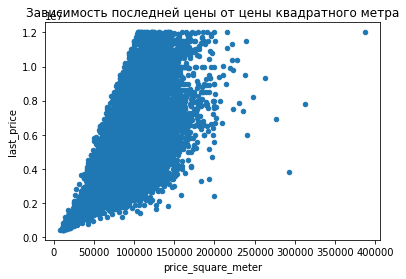

In [81]:
clean_data_query = f'{total_area_query} and {last_price_query}'
clean_data = df.query(clean_data_query)

clean_data.plot(x='price_square_meter', y='last_price', kind='scatter')
plt.title('Зависимость последней цены от цены квадратного метра')
plt.show()

In [82]:
clean_data['price_square_meter'].corr(clean_data['last_price'])

0.6185177365551552

Взаимосвязь между изменением цены за квадратный метр и стоимостью недвижимости есть.

#### Зависимость стоимости недвижимости от числа комнат
<a id='section33'></a>

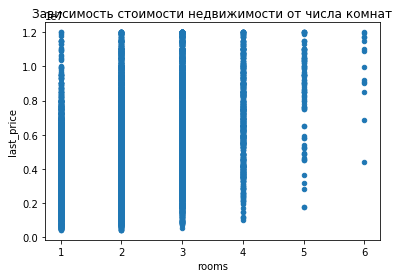

In [83]:
clean_data_query = f'{rooms_query} and {last_price_query}'
clean_data = df.query(clean_data_query)

clean_data.plot(x='rooms', y='last_price', kind='scatter')
plt.title('Зависимость стоимости недвижимости от числа комнат')
plt.show()

In [84]:
clean_data['rooms'].corr(clean_data['last_price'])

0.4613792114345852

Корреляция и график иллюстрируют слабую завимисоть между количеством комнат и стоимостью недвижимости.

In [85]:
# КОД РЕВЬЮВЕРА

rooms_pivot = df.pivot_table(index = 'rooms', values = ['last_price', 'price_square_meter'], aggfunc = 'median').reset_index()
rooms_pivot.columns = ['rooms', 'median_last_price', 'median_price_q_m']
display(rooms_pivot)

fig = px.line(rooms_pivot.query('rooms < 7'), x = 'rooms', y = 'median_last_price', title = 'Изменение медианной цены в зав-ти от комнат')
fig.show()

,rooms,median_last_price,median_price_q_m
0,0,2700000,105078.202487
1,1,3580000,99787.685775
2,2,4700000,91666.666667
3,3,6050000,87692.307692
4,4,8800000,90410.526316
5,5,13400000,96153.846154
6,6,19000000,99312.191939
7,7,24900000,111165.048544
8,8,24000000,106187.050360
9,9,24250000,85793.758283


#### Зависимость стоимости недвижимости от этажа
<a id='section34'></a>

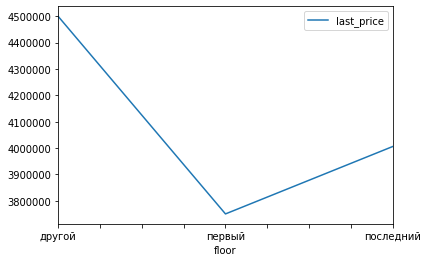

In [86]:
data_pivot_floors_category = df[['floor', 'last_price']].query(last_price_query).pivot_table(index='floor', values='last_price', aggfunc='median')
data_pivot_floors_category.plot(y='last_price', kind ='line')
plt.show()

Первый этаж – самый дешевый, на последнем этаже любям селиться не все, а этажи между, как правило, самые популярные.

#### Зависимость стоимости недвижимости от даты публикации объявления
<a id='section35'></a>

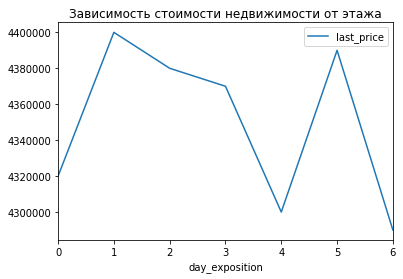

In [87]:
data_pivot_dates_days = df[['day_exposition', 'last_price']].query(last_price_query).pivot_table(index='day_exposition', values ='last_price', aggfunc='median')
data_pivot_dates_days.plot(y='last_price', kind ='line', title='Зависимость стоимости недвижимости от этажа')


                  last_price
month_exposition            
1                    4350000
2                    4350000
3                    4300000
4                    4400000
5                    4350000
6                    4200000
7                    4300000
8                    4350000
9                    4400000
10                   4310000
11                   4420000
12                   4385000


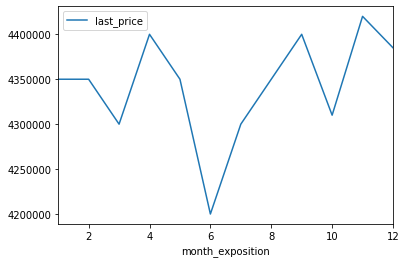

In [88]:
data_pivot_dates_month = df[['month_exposition', 'last_price']].query(last_price_query).pivot_table(index='month_exposition', values ='last_price', aggfunc='median')
data_pivot_dates_month.plot(y='last_price', kind ='line')
print(data_pivot_dates_month)

                 last_price
year_exposition            
2014                5475000
2015                4900000
2016                4300000
2017                4300000
2018                4300000
2019                4642500


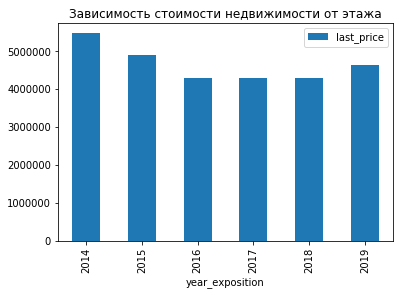

In [89]:
data_pivot_dates_year = df[['year_exposition', 'last_price']].query(last_price_query).pivot_table(index='year_exposition', values ='last_price', aggfunc='median')
data_pivot_dates_year.plot(y='last_price', kind ='bar', title='Зависимость стоимости недвижимости от этажа')
print(data_pivot_dates_year)

В июне размещаются самые дешевый метр, в августе и сентябре самый дорогой
В 2016 году цены на квадратный метр резко упали, так же резко выросли в 2019 году.

#### Зависимость стоимости недвижимости от расстояние до центра города (м)
<a id='section36'></a>

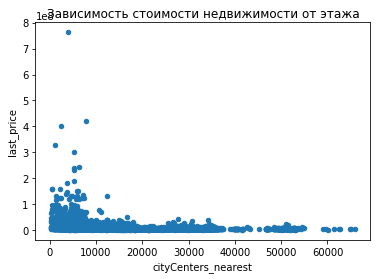

In [90]:
clean_data = df.query(last_price_query)
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', title='Зависимость стоимости недвижимости от этажа')
plt.show()

In [91]:
clean_data['cityCenters_nearest'].corr(clean_data['last_price'])

-0.35224129811917604

 По коэффициенту Пирсона видим, что так же есть слабая взаимосвязь между расстоянием от центра и ценой – к цетру дороже. Большинство объектов недвижимости так или иначе недалеко от центра. Основная часть дорогих объектов ожидаемо ближе к центру.

In [92]:
# КОД РЕВЬЮВЕРА

fig = px.scatter(df.query('cityCenters_nearest < 20000'), x = 'cityCenters_nearest', y = 'last_price', size = 'last_price', opacity=0.5, 
                title = 'Зависимость цены \ расстояния')
fig.show()

#### 10 населённых пунктов с наибольшим числом объявлений
<a id='section37'></a>

In [93]:
top_localities = df['locality_name'].value_counts().head(10)

In [94]:
top_localities

санкт-петербург      13577
поселок мурино         547
поселок шушары         407
всеволожск             339
колпино                308
пушкин                 307
поселок парголово      302
деревня кудрово        299
гатчина                268
выборг                 208
Name: locality_name, dtype: int64

In [95]:
top_locality_names = list(top_localities.index)

In [96]:
(
    df.query(f'locality_name in @top_locality_names and {last_price_query}')
    .pivot_table(index='locality_name', values='price_square_meter')
    .sort_values(by='price_square_meter', ascending=False)
)

,price_square_meter
locality_name,
санкт-петербург,104475.739612
пушкин,99629.604224
деревня кудрово,92409.726322
поселок парголово,89505.043917
поселок мурино,85691.011789
поселок шушары,77872.600324
колпино,74599.167217
гатчина,67845.395923
всеволожск,66878.746253


 В Санкт-Петербурге квадратный метр самый дорогой – столица, хоть и северная. В Выборге – самый дешевый.

#### Недвига в Питере
<a id='section38'></a>

In [97]:
saint_petersburg = pd.DataFrame(df.loc[df['locality_name'] == "санкт-петербург"])
saint_petersburg.reset_index()
len(saint_petersburg)

13577

Создадим столбец с расстоянием до центра в километрах округляя до целых значений

In [98]:
km = 1_000
saint_petersburg['cityCenters_nearest_km'] = (saint_petersburg['cityCenters_nearest'] / km).astype('int')

Считаем среднюю цену для каждого километра удаленности учитывания:

In [99]:
spb_prices = saint_petersburg.query(last_price_query)
spb_prices.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0,8.325341e+06
1,8.324500e+06
2,7.624891e+06
3,7.402790e+06
4,7.722288e+06
5,7.361288e+06
6,6.761366e+06
7,6.680150e+06
8,6.231193e+06



Построим график, который показывает как цена зависит от удалённости от центра:

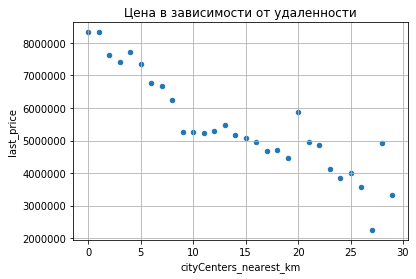

In [100]:
(
    pd.DataFrame(spb_prices.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', grid=True, title='Цена в зависимости от удаленности')
)
plt.show()

Определим границу, где график сильно меняется — это и будет центральная зона. В нашем случае это 7 км.

In [101]:
# КОД РЕВЬЮВЕРА

# я решил привести пример, чтобы было понятнее и нагляднее (p.s. если графики не будут отображаться, то просто перезапусти нотбук cell->run all)

#Добавил категорийный столбец в датафрейм спб
saint_petersburg['type_center']= saint_petersburg.loc[saint_petersburg['cityCenters_nearest_km'] <=8, 'type_center']='сenter'
saint_petersburg.loc[saint_petersburg['cityCenters_nearest_km'] >8, 'type_center']='outside_center'



# ПРИМЕР СОВМЕСТНОЙ ГИСТОГРАМКИ РАСПРЕДЕЛЕНИЯ

fig = px.histogram(saint_petersburg, x = 'total_area', color = 'type_center', marginal = 'box',
                  title = 'Распределение площади для центра\области Спб', opacity = 0.5)
fig.show()

# P.s. можно сделать через цикл по необходимому списку признаков (выше я давал пример)




# А ТЕПЕРЬ ПРИМЕР СОВМЕСТНОГО АНАЛИЗА ЧЕРЕЗ СВОДНЫЕ ТАБЛИЧКИ

# пусть будет этаж 

spb_floor = saint_petersburg.pivot_table(index = ['type_center', 'floor'], values = 'last_price', aggfunc = 'mean').reset_index()
display(spb_floor)

fig = px.line(spb_floor, x = 'floor', color = 'type_center', y = 'last_price', title = 'Изменение цены в зав-ти от этажа')
fig.show()




# ПРИМЕР ОБЫЧНОГО ТОЧЕЧНОГО ГРАФИКА

fig = px.scatter(saint_petersburg, x = 'total_area', y = 'last_price', color = 'type_center',
                 title = 'Корреляция цены в зав-ти от площади центр\область Спб', opacity = 0.5)
fig.show()

,type_center,floor,last_price
0,outside_center,другой,5.723998e+06
1,outside_center,первый,4.877605e+06
2,outside_center,последний,5.520162e+06
3,сenter,другой,1.321644e+07
4,сenter,первый,7.586447e+06
5,сenter,последний,1.649415e+07


Выделим сегмент квартир в центре.

In [102]:
aparts_in_center = pd.DataFrame(spb_prices.query('cityCenters_nearest_km <= 7'))
len(aparts_in_center)

2192

Проанализируем этот сегмент.

In [103]:
aparts_in_center.query(total_area_query)['total_area'].describe()

count    2108.000000
mean       63.959677
std        21.177707
min        12.000000
25%        47.000000
50%        62.000000
75%        79.000000
max       115.000000
Name: total_area, dtype: float64

In [104]:
aparts_in_center['last_price'].describe()

count    2.192000e+03
mean     7.383439e+06
std      2.264909e+06
min      1.600000e+06
25%      5.700000e+06
50%      7.200000e+06
75%      9.000000e+06
max      1.200000e+07
Name: last_price, dtype: float64

In [105]:
aparts_in_center.query(rooms_query)['rooms'].describe()

count    2176.000000
mean        2.354779
std         1.037705
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [106]:
aparts_in_center.query(ceiling_height_query)['ceiling_height'].describe()

count    1907.000000
mean        2.773052
std         0.193804
min         2.400000
25%         2.650000
50%         2.650000
75%         2.950000
max         3.200000
Name: ceiling_height, dtype: float64

In [107]:
# КОД РЕВЬЮВЕРА

# можно сделать и так

fig = px.bar(saint_petersburg.pivot_table(index = 'type_center', values = 'ceiling_height', aggfunc = 'mean').reset_index(),
            x = 'type_center', y = 'ceiling_height', color = 'type_center',
            title = 'Сравнение потолков центр\область Спб')
fig.show()


Выделим факторы, влияющие на стоимость квартиры.

Добавим остальные критерии, влияющие на чистоту данных, и сделаем окончательный срез на их основе.

In [108]:
clean_data_query = f'{total_area_query} and {rooms_query} and {ceiling_height_query} and {days_exposition_query}'
clean_data = aparts_in_center.query(clean_data_query)

In [109]:
features = [
    'last_price',
    'cityCenters_nearest_km',
    'total_area',
    'rooms',
    'ceiling_height',
    'day_exposition',
    'month_exposition',
    'year_exposition',
    'floor'
]

clean_data[features].corr().sort_values('last_price', ascending=False)

,last_price,cityCenters_nearest_km,total_area,rooms,ceiling_height,day_exposition,month_exposition,year_exposition
last_price,1.000000,-0.139983,0.699675,0.423292,0.136539,0.025050,-0.004275,0.029246
total_area,0.699675,-0.177408,1.000000,0.792693,0.180565,-0.001937,0.025935,-0.088336
rooms,0.423292,-0.166181,0.792693,1.000000,0.169735,0.002910,0.039902,-0.053105
ceiling_height,0.136539,-0.161333,0.180565,0.169735,1.000000,-0.050776,-0.023339,0.076593
year_exposition,0.029246,0.031475,-0.088336,-0.053105,0.076593,0.028121,-0.224555,1.000000
day_exposition,0.025050,0.029217,-0.001937,0.002910,-0.050776,1.000000,0.034259,0.028121
month_exposition,-0.004275,0.000060,0.025935,0.039902,-0.023339,0.034259,1.000000,-0.224555
cityCenters_nearest_km,-0.139983,1.000000,-0.177408,-0.166181,-0.161333,0.029217,0.000060,0.031475


In [110]:
clean_data.pivot_table(index='floor', values='last_price').sort_values(by='last_price')

,last_price
floor,
первый,5.954684e+06
последний,7.121522e+06
другой,7.357224e+06


Как и в случае с недвижимостью по всем населенным пунктам, в Петербурге все также самый дешевый этаж – это первый, а самые дорогие – между первым и последним.

In [111]:
clean_data.pivot_table(index='rooms', values='day_exposition').sort_values(by='day_exposition')

,day_exposition
rooms,
6,1.000000
1,2.536313
3,2.554479
5,2.625000
4,2.630631
2,2.650582


In [112]:
clean_data.pivot_table(index='rooms', values='month_exposition').sort_values(by='month_exposition')

,month_exposition
rooms,
1,6.519553
2,6.690516
3,6.823245
4,6.891892
6,7.000000
5,7.875000


In [113]:
clean_data.pivot_table(index='rooms', values='year_exposition').sort_values(by='year_exposition')

,year_exposition
rooms,
4,2016.981982
6,2017.000000
1,2017.304469
3,2017.305085
2,2017.326123
5,2017.625000


In [114]:
Чаще всего в 20

SyntaxError: invalid syntax (<ipython-input-114-9120db8b2dc6>, line 1)

In [117]:
# КОД РЕВЬЮВЕРА
saint_petersburg.query('cityCenters_nearest_km < 8').corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,is_apartment,studio,open_plan,...,days_exposition,part_living_area,part_kitchen_area,price_square_meter,day_exposition,month_exposition,year_exposition,living_total_area,kitchen_total_area,cityCenters_nearest_km
total_images,1.000000,0.128047,0.095940,0.053629,0.061126,-0.011156,0.074571,0.005941,-0.033612,-0.040960,...,-0.039205,-0.046743,0.041949,0.158280,0.017373,0.005773,0.113942,-0.039664,0.044839,0.020694
last_price,0.128047,1.000000,0.639169,0.340269,0.088080,0.046324,0.560644,0.028916,-0.022109,0.009386,...,0.061438,-0.015667,-0.091191,0.799531,0.023698,-0.000893,-0.065262,-0.017298,-0.076874,-0.043629
total_area,0.095940,0.639169,1.000000,0.743952,0.171858,-0.014023,0.944494,0.043305,-0.053766,0.007377,...,0.137884,0.130771,-0.311007,0.287306,0.008533,-0.008287,-0.113616,0.119042,-0.286561,-0.108849
rooms,0.053629,0.340269,0.743952,1.000000,0.133991,-0.177309,0.804936,0.002558,-0.119960,-0.044083,...,0.134461,0.401950,-0.486461,0.036841,-0.007061,-0.013346,-0.096909,0.388518,-0.450299,-0.183032
ceiling_height,0.061126,0.088080,0.171858,0.133991,1.000000,-0.179880,0.188036,0.040373,0.022944,-0.000283,...,0.073141,0.073713,-0.054328,0.055225,-0.047653,-0.007435,0.002496,0.073896,-0.049258,-0.161845
floors_total,-0.011156,0.046324,-0.014023,-0.177309,-0.179880,1.000000,-0.105726,-0.014361,-0.003000,0.019190,...,-0.004442,-0.334275,0.173692,0.114319,0.033003,0.006092,-0.027712,-0.321645,0.165785,0.376004
living_area,0.074571,0.560644,0.944494,0.804936,0.188036,-0.105726,1.000000,0.051606,-0.041645,0.010340,...,0.136522,0.400973,-0.442291,0.215044,-0.000774,-0.010288,-0.109748,0.380311,-0.412279,-0.150234
is_apartment,0.005941,0.028916,0.043305,0.002558,0.040373,-0.014361,0.051606,1.000000,-0.003874,-0.003036,...,0.061910,0.040934,-0.000559,0.046445,-0.047462,0.018824,-0.025708,0.039044,-0.004389,-0.044484
studio,-0.033612,-0.022109,-0.053766,-0.119960,0.022944,-0.003000,-0.041645,-0.003874,1.000000,-0.003302,...,-0.037595,0.067765,NaN,-0.004472,0.002485,0.009666,0.024399,0.064921,-0.019114,0.006085
open_plan,-0.040960,0.009386,0.007377,-0.044083,-0.000283,0.019190,0.010340,-0.003036,-0.003302,1.000000,...,-0.030086,0.060364,NaN,0.009723,0.013325,0.012688,-0.011910,0.050549,-0.014982,0.018956


In [119]:
# КОД РЕВЬЮВЕРА
saint_petersburg.query('cityCenters_nearest_km >= 8').corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,is_apartment,studio,open_plan,...,days_exposition,part_living_area,part_kitchen_area,price_square_meter,day_exposition,month_exposition,year_exposition,living_total_area,kitchen_total_area,cityCenters_nearest_km
total_images,1.000000,0.145121,0.117588,0.084807,-0.014760,0.024209,0.105578,0.011085,-0.015853,-0.001885,...,-0.031884,-0.004289,-0.033670,0.124429,0.002046,0.025140,0.126325,-0.002018,-0.018070,-0.004167
last_price,0.145121,1.000000,0.811312,0.487263,0.060145,0.142613,0.694073,0.005637,-0.055500,-0.033119,...,0.096587,-0.029579,-0.125022,0.527413,0.003904,0.012691,-0.018037,-0.028467,-0.112945,-0.147596
total_area,0.117588,0.811312,1.000000,0.748084,0.022034,0.071679,0.924858,-0.009926,-0.088030,-0.052397,...,0.124360,0.129276,-0.339976,0.050606,-0.003228,0.006263,-0.076209,0.124259,-0.311374,-0.057053
rooms,0.084807,0.487263,0.748084,1.000000,-0.002761,-0.180265,0.853522,-0.024446,-0.159958,-0.098036,...,0.085144,0.533237,-0.651120,-0.217517,-0.006310,0.003840,-0.063159,0.513221,-0.588646,-0.065923
ceiling_height,-0.014760,0.060145,0.022034,-0.002761,1.000000,0.010055,0.015802,0.242136,0.000918,-0.000944,...,-0.001382,-0.008962,0.044162,0.189987,-0.009246,-0.004598,0.008312,-0.008784,0.040078,-0.032644
floors_total,0.024209,0.142613,0.071679,-0.180265,0.010055,1.000000,-0.065148,-0.023344,0.071850,0.052105,...,0.009125,-0.407328,0.368757,0.262779,0.027040,-0.007960,0.001333,-0.391232,0.333003,0.097109
living_area,0.105578,0.694073,0.924858,0.853522,0.015802,-0.065148,1.000000,-0.016033,-0.064008,-0.035291,...,0.109346,0.472935,-0.546679,-0.063942,-0.001764,-0.000850,-0.072172,0.459035,-0.511227,-0.085609
is_apartment,0.011085,0.005637,-0.009926,-0.024446,0.242136,-0.023344,-0.016033,1.000000,-0.003252,-0.002029,...,-0.000858,-0.023050,0.026781,0.057491,-0.009651,0.000096,0.022321,-0.021723,0.017524,0.047525
studio,-0.015853,-0.055500,-0.088030,-0.159958,0.000918,0.071850,-0.064008,-0.003252,1.000000,-0.003834,...,-0.014291,0.103900,NaN,0.047825,0.001862,0.006152,0.016887,0.103248,-0.043582,0.009232
open_plan,-0.001885,-0.033119,-0.052397,-0.098036,-0.000944,0.052105,-0.035291,-0.002029,-0.003834,1.000000,...,-0.019994,0.080830,NaN,0.027157,0.013609,0.029313,-0.011360,0.077487,-0.027188,0.011747


### Шаг 5. Общий вывод
<a id='section39'></a>

Зависимость параметров квартир:

1. с ростом этажа: цена за метр аналогично растет
2. с ростом площади: цена растет, цена за метр незначительно падает
3. с ростом цены: цена за метр растет
4. площадь не связана с: ценой за метр и этажем

В среднем люди продают квартиру за 90 дней

Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат

Недвижимость в центре Петербурга ожидаемо стоит дороже остальных населенных пунктов.                    

Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров(удаленность от аэропортов, парков, прудов) цена за квадрадный почти не зависит.

Чем больше комнат, тем выше цена.

День размещения квартиры: Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.

Различия квартиры: 
1. Потолки в области выше чем в городе
2. Площадь квартиры в области больше